# Final propagation step to wave breaking

In [1]:
# common 
import sys
import os
import os.path as op

# basic 
import xarray as xr
import numpy as np
import pandas as pd
from datetime import timedelta as td
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters

# warnings
import warnings
warnings.filterwarnings("ignore")

# dev library 
sys.path.insert(0, os.getcwd())

# RBF module 
from slopes import Slopes

In [2]:
# Load the surfbreaks historic
surfbreaks_historic = xr.open_dataset('reconstructed_surfbreaks.nc')

In [3]:
# Select the surfbreak
name = 'liencres'
surfbreak = surfbreaks_historic.sel(beach=name).to_dataframe()[::4]

In [4]:
tides = xr.open_dataset('tides_can.nc').to_dataframe()['ocean_tide'].copy()

In [5]:
delta_angle = 350
wf = 0.004
reconstructed_depth = 10

In [6]:
liencres_slope = Slopes(reconstructed_data=surfbreak,
                        tides=tides,
                        delta_angle=delta_angle,
                        wf=wf,
                        name=name,
                        reconstructed_depth=reconstructed_depth)


 Rolling mean and $Ω$ calculated!! 


 For aggregated parameters (Agg) usage say True 
, for Spectral parameters (Spec), say False (empty box): 


 Mean wave direction: -33.94095583915859 


 Mean wind direction: -2.1335561159325866 


 Select the tidal range (TR): 
3.7

 Select the value for $γ$: 
0.6

 Heights asomerament difference: Hb / Hs : 2.097937525791903 


 Slopes main object constructed!! 



In [7]:
liencres_slope.data

,Hs,Tp,Dir,Spr,W,DirW,DDir,DDirW,ocean_tide,Omega,H_break,DDir_R
1979-05-05 17:00:00,1.235065,7.814923,318.850972,12.540134,4.081666,30.963758,-0.543653,0.714952,2.801588,50.141456,2.696978,-0.271969
1979-05-06 17:00:00,0.761806,6.913884,319.693663,14.661326,3.538361,47.290610,-0.528945,0.999910,2.459435,50.098613,1.819006,-0.216918
1979-05-07 17:00:00,0.707989,3.778428,348.681119,28.097726,8.731552,69.904768,-0.023019,1.394601,2.042047,50.151811,1.806094,-0.009782
1979-05-08 17:00:00,0.215389,3.779365,2.151072,19.788510,5.442426,290.432829,0.212076,-1.039643,1.606510,50.018762,0.646166,0.053532
1979-05-09 17:00:00,0.431400,9.426914,300.040007,13.871614,3.125700,7.352379,-0.871966,0.302856,1.213212,49.925100,1.030078,-0.248259
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-17 09:00:00,5.475689,16.318870,310.153411,8.043992,10.104455,268.298645,-0.695454,-1.425958,2.038941,55.093948,9.275146,-0.665021
2020-02-18 09:00:00,5.634803,15.693108,311.183431,8.272913,6.082763,260.537678,-0.677477,-1.561412,2.663681,55.559860,9.544666,-0.659083
2020-02-19 09:00:00,3.503423,13.444793,312.867737,7.459247,4.396590,252.801459,-0.648080,-1.696435,3.193639,55.631454,6.220363,-0.496214
2020-02-20 09:00:00,2.502514,13.115787,310.761508,7.856118,3.590265,282.875002,-0.684841,-1.171552,3.569989,55.571836,4.647526,-0.445852


In [8]:
liencres_slope.perform_propagation()

0 waves analyzed...
10000 waves analyzed...

 Slopes main object finally constructed!! 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13946 entries, 1979-05-05 17:00:00 to 2020-02-21 09:00:00
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hs          13946 non-null  float64
 1   Tp          13946 non-null  float64
 2   Dir         13946 non-null  float64
 3   Spr         13946 non-null  float64
 4   W           13946 non-null  float64
 5   DirW        13946 non-null  float64
 6   DDir        13946 non-null  float64
 7   DDirW       13946 non-null  float64
 8   ocean_tide  13946 non-null  float64
 9   Omega       13946 non-null  float64
 10  H_break     13946 non-null  float64
 11  DDir_R      13946 non-null  float64
 12  Slope       13946 non-null  float64
 13  Iribarren   13946 non-null  float64
dtypes: float64(14)
memory usage: 1.6 MB
None


KeyError: 'Actual_Slope'

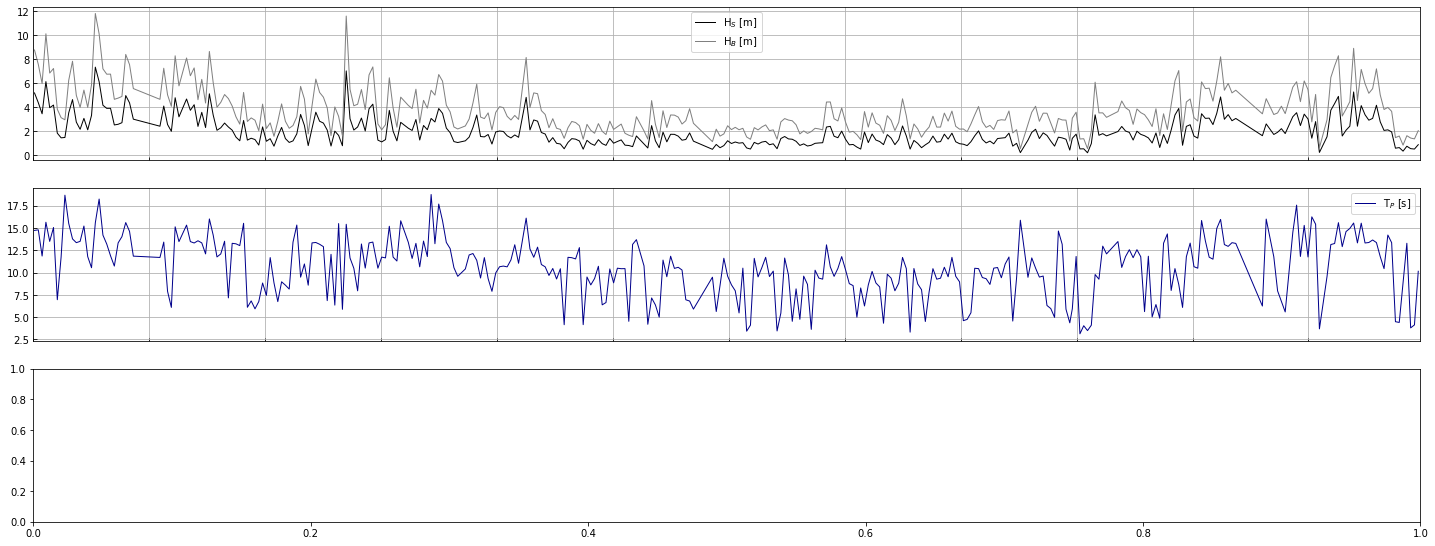

In [9]:
liencres_slope.moving_profile()